In [ ]:
# Printing each image year wise
import tifffile
import matplotlib.pyplot as plt
import numpy as np

# Replace 'your_image.tif' with the path to your time series satellite image file in TIFF format
image_path = '/content/MODMYD09cloud_EVImax_2000_2022_CLM.tiff'

# Open the TIFF image file
image_stack = tifffile.imread(image_path)

# Get the number of time steps (months)
num_time_steps = image_stack.shape[2]

Creating the Whole Average Cloud Removed Graph

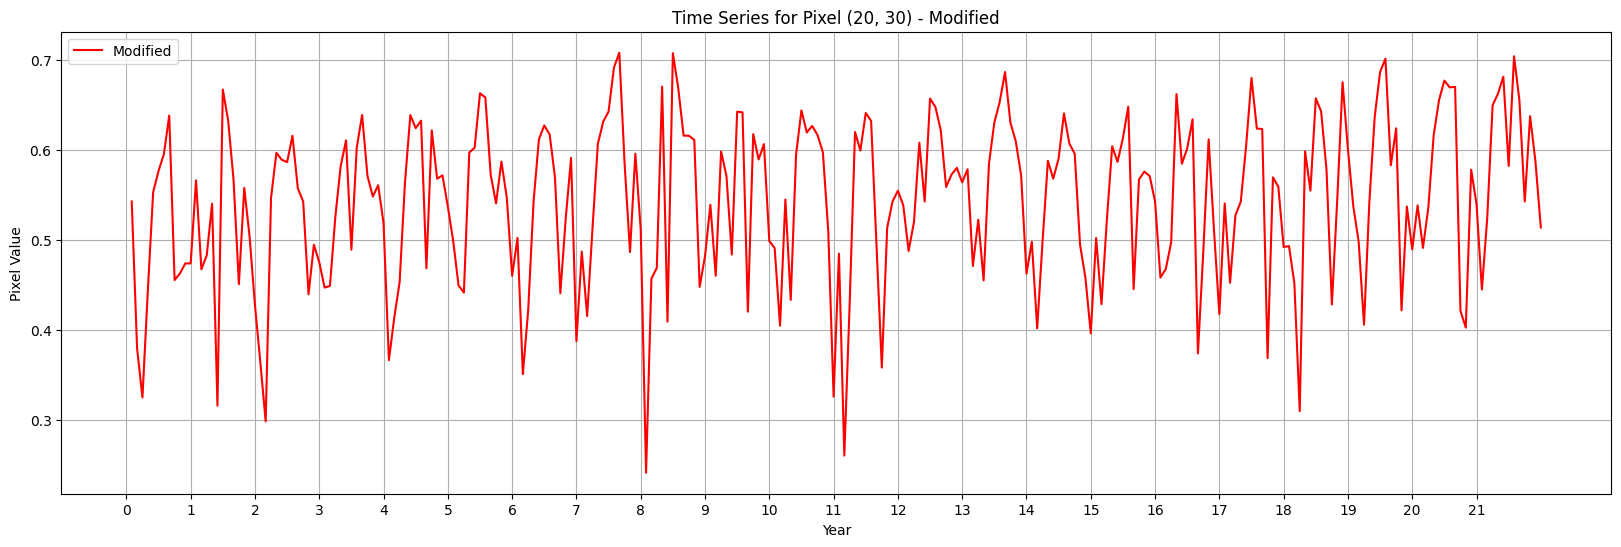

In [ ]:
# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 20
pixel_col = 30

# Calculate the x-axis values in years
months_per_year = 12
years = np.arange(1, num_time_steps + 1) / months_per_year

# Make a copy of the original image stack to avoid modifying it
modified_images = np.copy(image_stack)

# Iterate over each month
for target_month in range(image_stack.shape[2]):
    # Get the image for the selected month
    selected_image = modified_images[:, :, target_month]

    # Fill NaN values in the current month by taking the average of non-NaN values in other months
    for i in range(selected_image.shape[0]):
        for j in range(selected_image.shape[1]):
            if np.isnan(selected_image[i, j]):
                non_nan_values = np.concatenate([modified_images[i, j, :target_month], modified_images[i, j, (target_month + 1):]])  # Exclude the current month
                non_nan_values = non_nan_values[~np.isnan(non_nan_values)]  # Remove NaN values
                if non_nan_values.size > 0:
                    selected_image[i, j] = np.mean(non_nan_values)

    # Assign the modified image to the corresponding slice in modified_images
    modified_images[:, :, target_month] = selected_image

# Extract the modified time series for the chosen pixel
modified_pixel_values = modified_images[pixel_row, pixel_col, :]

# Plot the modified time series
plt.figure(figsize=(20, 6))
plt.plot(years, modified_pixel_values, linestyle='-', color='r', label='Modified')
plt.title(f'Time Series for Pixel ({pixel_row}, {pixel_col}) - Modified')
plt.xlabel('Year')
plt.ylabel('Pixel Value')
plt.grid(True)
plt.legend()
plt.xticks(range(0, 22))
plt.show()

**Creating the interpolated image stack**

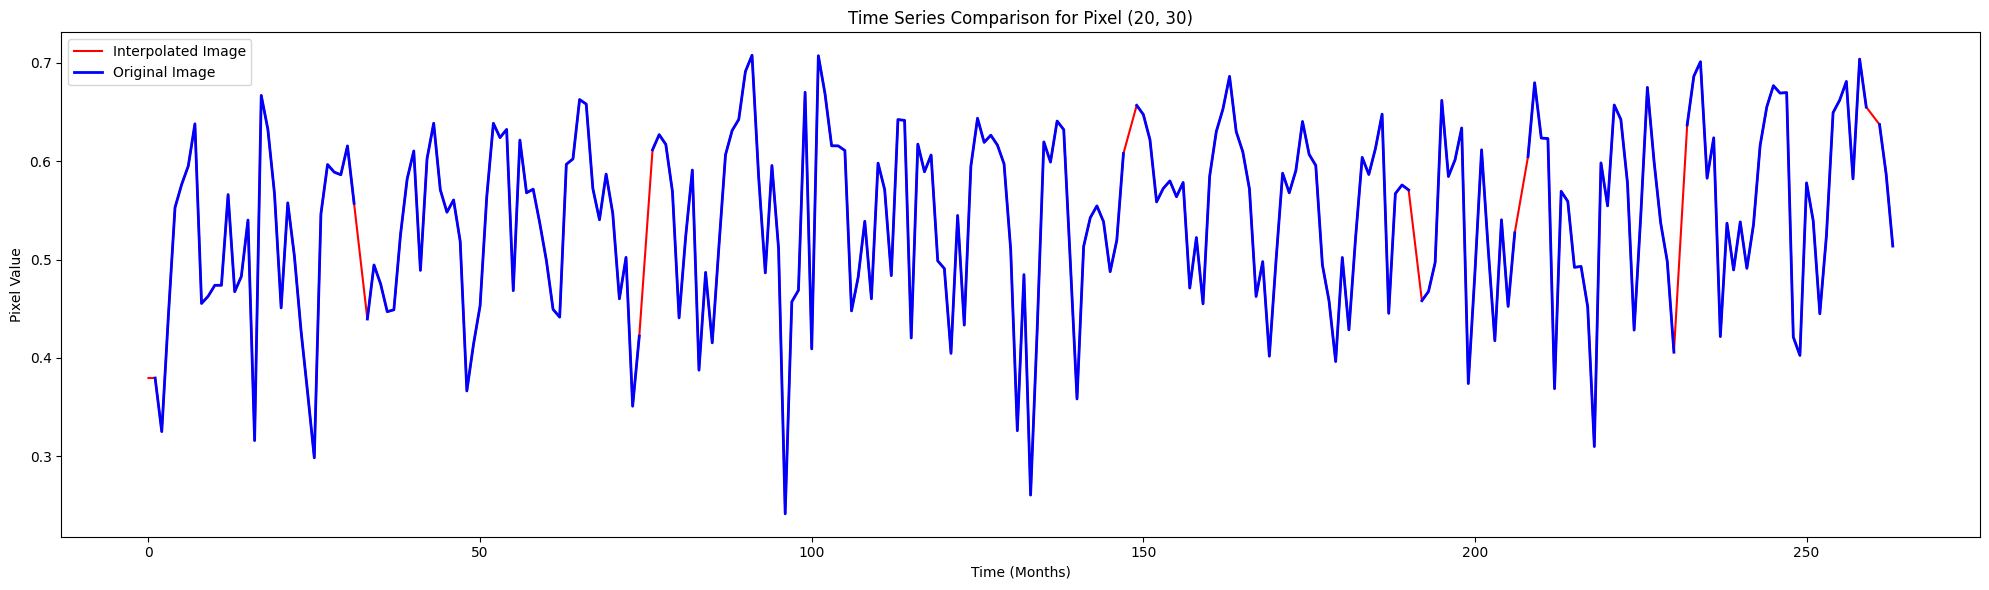

In [ ]:
import numpy as np
# Interpolate NaN values along the time axis for each pixel
interpolated_images = np.empty_like(image_stack)
for i in range(image_stack.shape[0]):
    for j in range(image_stack.shape[1]):
        pixel_values = image_stack[i, j, :]
        non_nan_indices = ~np.isnan(pixel_values)
        if np.sum(non_nan_indices) > 1:
            interpolated_images[i, j, :] = np.interp(np.arange(len(pixel_values)), np.arange(len(pixel_values))[non_nan_indices], pixel_values[non_nan_indices])
        else:
            # If only one non-NaN value or all NaN, keep the original values
            interpolated_images[i, j, :] = pixel_values

# Visualize the original and interpolated time series for a specific pixel
pixel_row = 20
pixel_col = 30

original_pixel_values = image_stack[pixel_row, pixel_col, :]
interpolated_pixel_values = interpolated_images[pixel_row, pixel_col, :]

plt.figure(figsize=(20, 6))
plt.plot(interpolated_pixel_values, linestyle='-', color='r', label='Interpolated Image')
plt.plot(original_pixel_values, linestyle='-', linewidth=2,color='b', label='Original Image')
# plt.plot(restored_pixel_values, linestyle='-', linewidth=3, color='green', alpha=0.6, label='Restored Image')
plt.title(f'Time Series Comparison for Pixel ({pixel_row}, {pixel_col})')
plt.xlabel('Time (Months)')
plt.ylabel('Pixel Value')
plt.legend()
plt.tight_layout()
plt.show()

Printing the Interpolated graph, Whole average graph

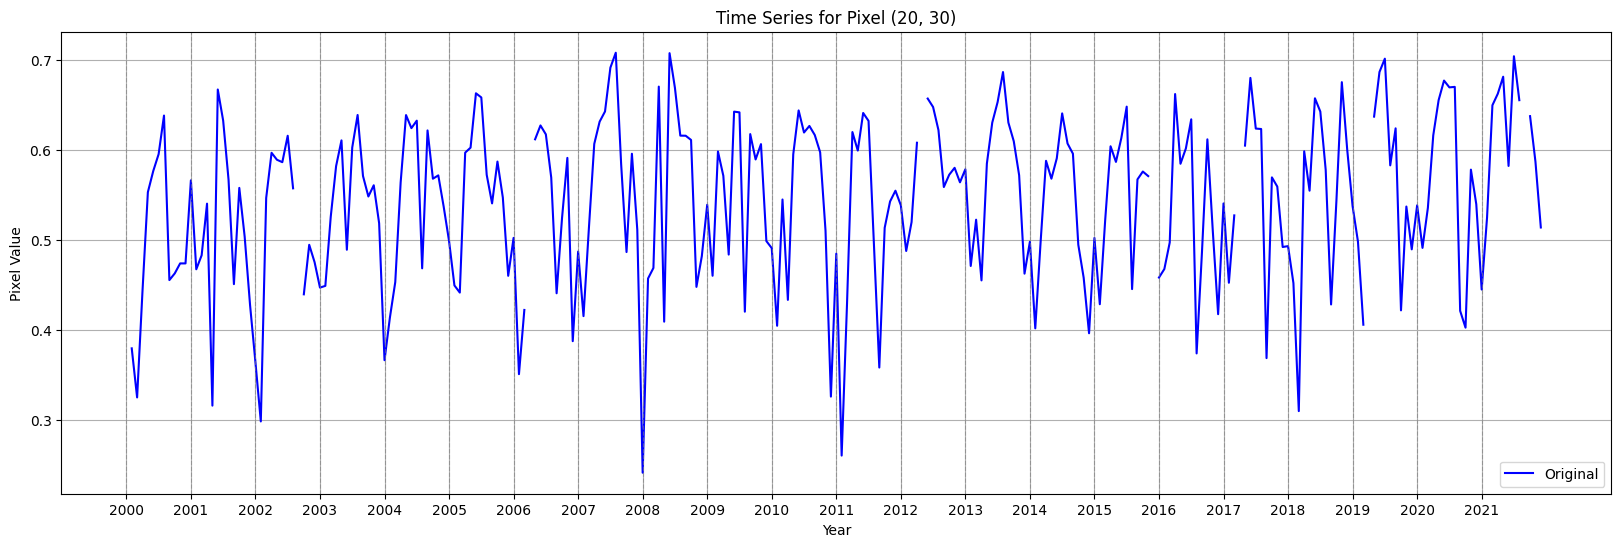

In [ ]:
import matplotlib.pyplot as plt

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 20
pixel_col = 30

# Extract the original time series for the chosen pixel
original_pixel_values = image_stack[pixel_row, pixel_col, :]

# Calculate the x-axis values in years
months_per_year = 12
years = np.arange(2000, 2022, 1)

# Plot the original time series
plt.figure(figsize=(20, 6))
plt.plot(original_pixel_values, linestyle='-', color='b', label='Original')
plt.title(f'Time Series for Pixel ({pixel_row}, {pixel_col})')
plt.xlabel('Year')
plt.ylabel('Pixel Value')
plt.grid(True)

# Add vertical grid lines at the beginning of each year
for year in range(min(years), max(years) + 1):
    plt.axvline((year - 2000) * months_per_year, color='gray', linestyle='--', linewidth=0.8, alpha=0.6)

plt.xticks(np.arange(0, len(original_pixel_values), months_per_year), years)  # Set x-axis ticks at the beginning of each year
plt.legend()
plt.show()


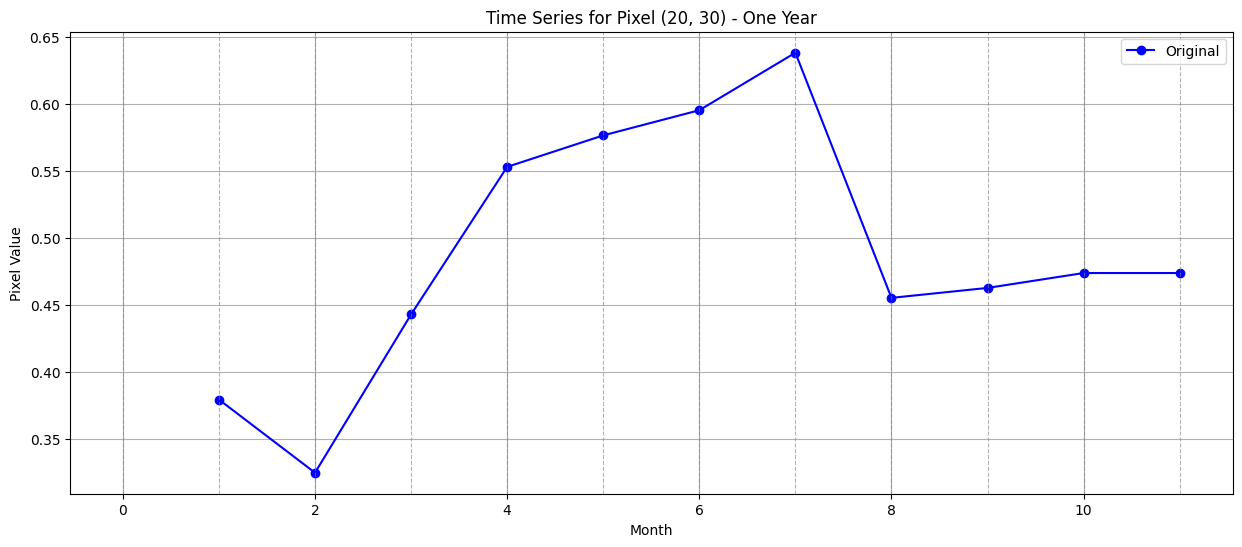

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 20
pixel_col = 30

# Extract the original time series for the chosen pixel
original_pixel_values = image_stack[pixel_row, pixel_col, :]

# Plot the original time series for one year
plt.figure(figsize=(15, 6))
plt.plot(original_pixel_values[:12], linestyle='-', marker='o', color='b', label='Original')
plt.title(f'Time Series for Pixel ({pixel_row}, {pixel_col}) - One Year')
plt.xlabel('Month')
plt.ylabel('Pixel Value')
plt.grid(True)

# Add vertical grid lines at the beginning of each month
for month in range(1, 13):
    plt.axvline(month - 1, color='gray', linestyle='--', linewidth=0.8, alpha=0.6)

plt.legend()
plt.show()


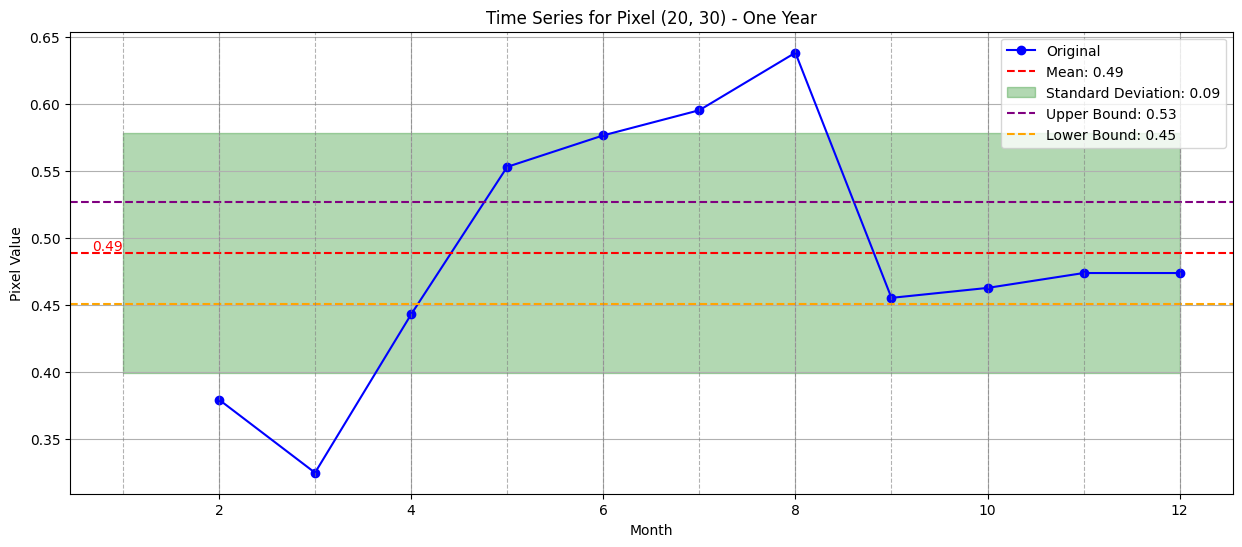

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 20
pixel_col = 30

# Extract the original time series for the chosen pixel for one year
original_pixel_values = image_stack[pixel_row, pixel_col, :12]  # Extracting the first 12 months

# Exclude nan values from the original time series
valid_values = original_pixel_values[~np.isnan(original_pixel_values)]

# Check if there are valid values
if valid_values.size > 0:
    # Calculate mean and standard deviation
    mean_value = np.mean(valid_values)
    std_value = np.std(valid_values)

    # Calculate upper and lower bounds (let's use a confidence level of 95%)
    confidence_level = 0.95
    margin_of_error = std_value * np.sqrt(1 / len(valid_values) + 1 / len(valid_values))
    ub_value = mean_value + margin_of_error
    lb_value = mean_value - margin_of_error

    # Plot the original time series for one year
    plt.figure(figsize=(15, 6))
    x_values = np.arange(1, 13)
    plt.plot(x_values, original_pixel_values, linestyle='-', marker='o', color='b', label='Original')

    # Plot mean line
    plt.axhline(mean_value, linestyle='--', color='r', label=f'Mean: {mean_value:.2f}')

    # Plot standard deviation as error bars
    plt.fill_between(x_values, mean_value - std_value, mean_value + std_value, color='g', alpha=0.3, label=f'Standard Deviation: {std_value:.2f}')

    # Plot upper and lower bounds
    plt.axhline(ub_value, linestyle='--', color='purple', label=f'Upper Bound: {ub_value:.2f}')
    plt.axhline(lb_value, linestyle='--', color='orange', label=f'Lower Bound: {lb_value:.2f}')

    # Annotate mean value on the plot
    plt.text(x_values[0], mean_value, f'{mean_value:.2f}', va='bottom', ha='right', color='r')

    plt.title(f'Time Series for Pixel ({pixel_row}, {pixel_col}) - One Year')
    plt.xlabel('Month')
    plt.ylabel('Pixel Value')
    plt.grid(True)

    # Add vertical grid lines at the beginning of each month
    for month in range(1, 13):
        plt.axvline(month, color='gray', linestyle='--', linewidth=0.8, alpha=0.6)

    plt.legend()
    plt.show()
else:
    print("No valid values in the original time series.")


**Applying Mean  Month wise.**

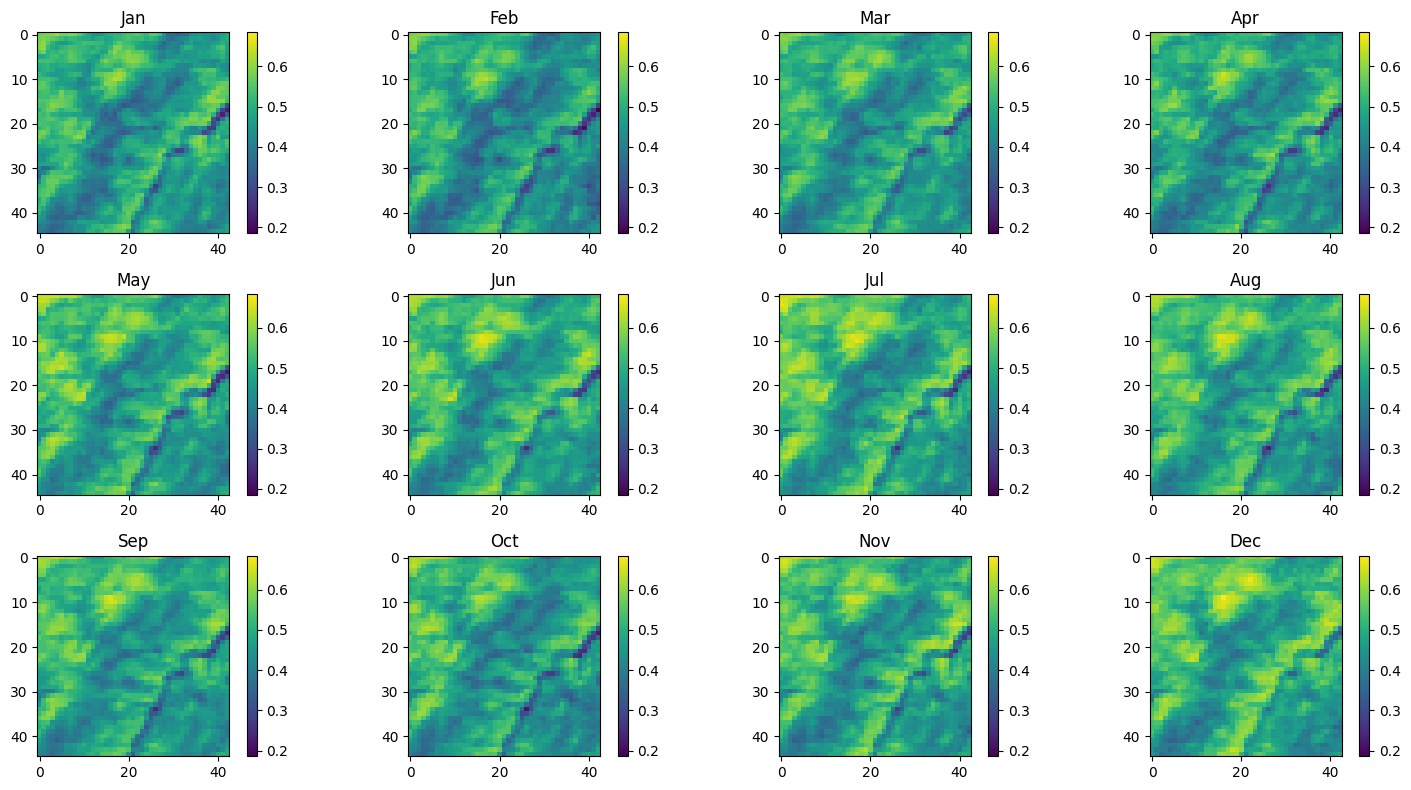

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the image_stack to have dimensions (height, width, 12, 22)
reshaped_stack = image_stack.reshape((image_stack.shape[0], image_stack.shape[1], 12, -1))

# Calculate the mean for each pixel and each month, ignoring NaN values
mean_values_month_wise = np.nanmean(reshaped_stack, axis=3)

# Plot the mean values for each month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(15, 8))
for month in range(12):
    plt.subplot(3, 4, month + 1)
    plt.imshow(mean_values_month_wise[:, :, month], cmap='viridis', vmin=np.nanmin(mean_values_month_wise), vmax=np.nanmax(mean_values_month_wise))
    plt.title(months[month])
    plt.colorbar()

plt.tight_layout()
plt.show()


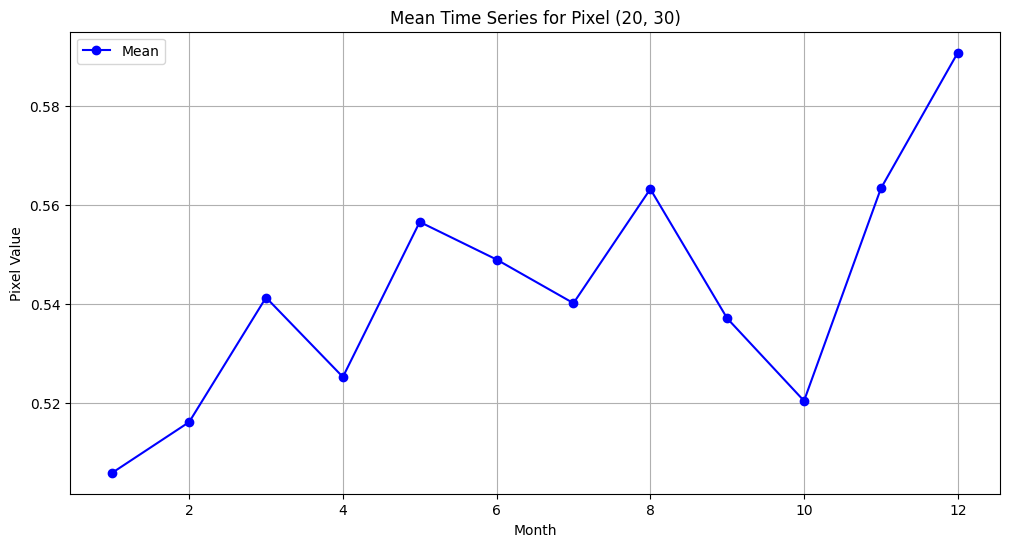

In [ ]:
import matplotlib.pyplot as plt

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 20
pixel_col = 30


# Extract the mean time series for the chosen pixel
mean_pixel_values = mean_values_month_wise[pixel_row, pixel_col, :]

# Calculate the x-axis values for months
months = np.arange(1, 13)

# Plot the mean time series
plt.figure(figsize=(12, 6))
plt.plot(months, mean_pixel_values, linestyle='-', marker='o', color='b', label='Mean')
plt.title(f'Mean Time Series for Pixel ({pixel_row}, {pixel_col})')
plt.xlabel('Month')
plt.ylabel('Pixel Value')
plt.grid(True)
plt.legend()
plt.show()


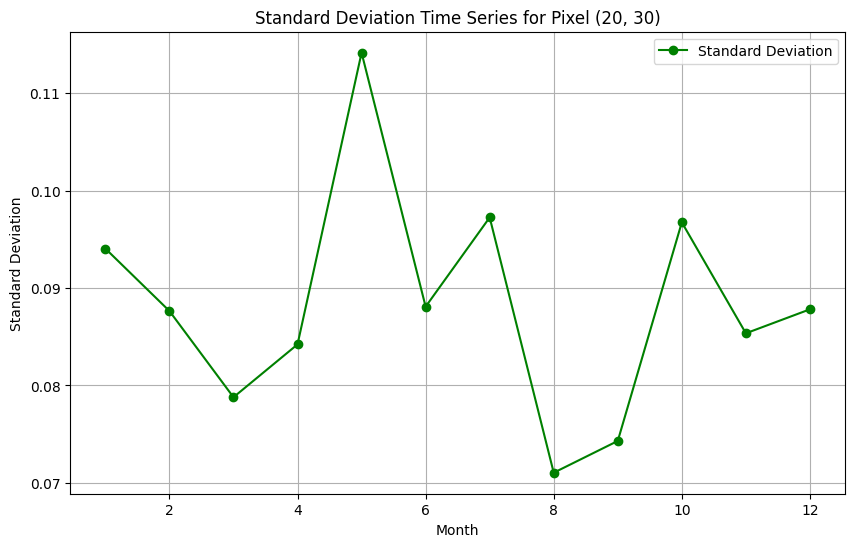

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the standard deviation for each pixel and each month, ignoring NaN values
std_values_month_wise = np.nanstd(reshaped_stack, axis=3)

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 20
pixel_col = 30

# Extract the SD time series for the chosen pixel
std_pixel_values = std_values_month_wise[pixel_row, pixel_col, :]

# Plot the SD time series
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 13), std_pixel_values, linestyle='-', marker='o', color='g', label='Standard Deviation')
plt.title(f'Standard Deviation Time Series for Pixel ({pixel_row}, {pixel_col})')
plt.xlabel('Month')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


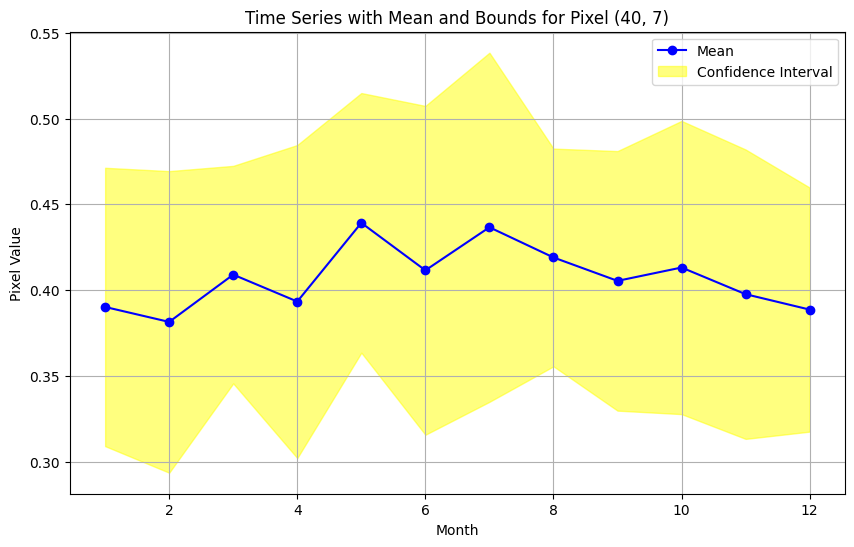

In [ ]:
# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 40
pixel_col = 7

# Extract the mean and SD time series for the chosen pixel
mean_pixel_values = mean_values_month_wise[pixel_row, pixel_col, :]
std_pixel_values = std_values_month_wise[pixel_row, pixel_col, :]

# Calculate upper and lower bounds
upper_bound = mean_pixel_values + std_pixel_values
lower_bound = mean_pixel_values - std_pixel_values

# Plot the mean with error bars representing the standard deviation
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 13), mean_pixel_values, linestyle='-', marker='o', color='b', label='Mean')
plt.fill_between(np.arange(1, 13), upper_bound, lower_bound, color='yellow', alpha=0.5, label='Confidence Interval')
plt.title(f'Time Series with Mean and Bounds for Pixel ({pixel_row}, {pixel_col})')
plt.xlabel('Month')
plt.ylabel('Pixel Value')
plt.legend()
plt.grid(True)
plt.show()


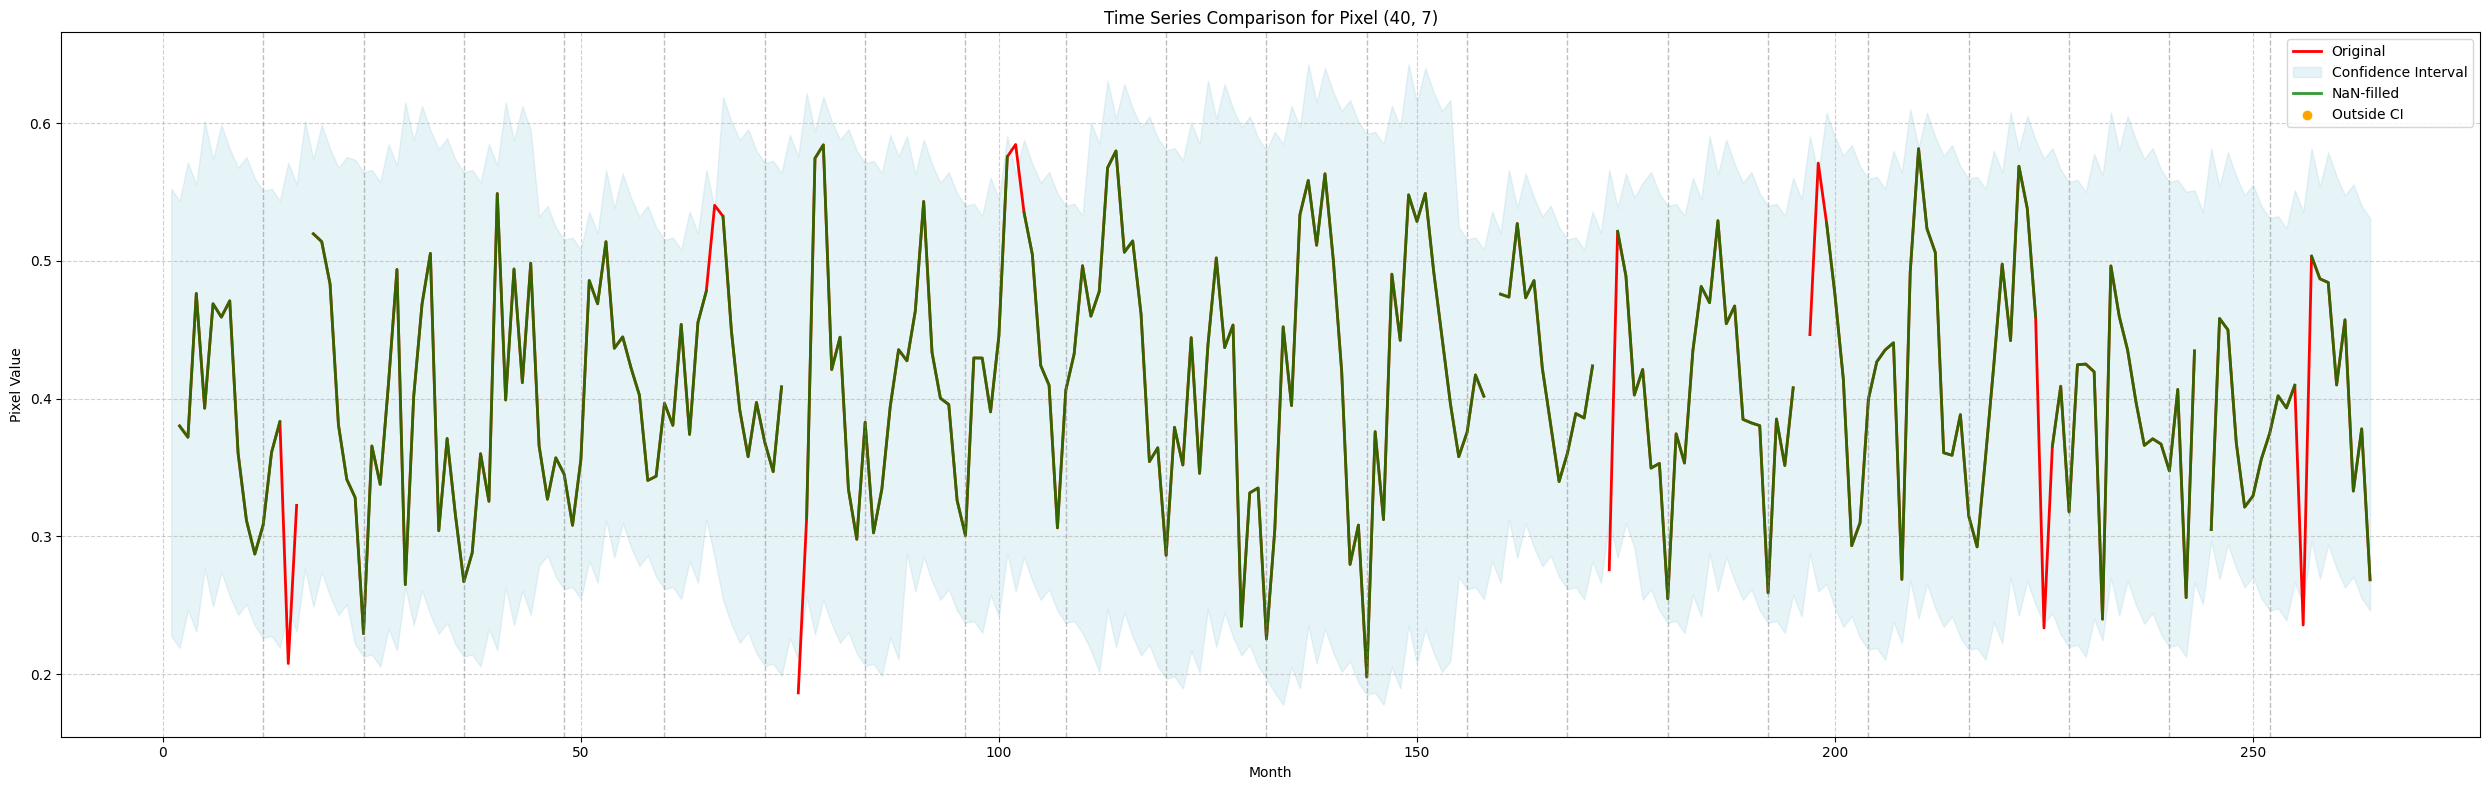

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 40
pixel_col = 7
# Calculate total number of months in the original time series
total_months = image_stack.shape[2]

# Calculate total number of years
num_years = total_months // 12

# Extract the mean and SD time series for the chosen pixel
mean_pixel_values = mean_values_month_wise[pixel_row, pixel_col, :]

# Repeat mean values for each month and each year to match the shape of image_stack
mean_pixel_values = np.tile(mean_pixel_values, num_years)

# Repeat std values for each month to match the shape of image_stack
std_pixel_values = np.repeat(std_values_month_wise[pixel_row, pixel_col, :], num_years)

# Calculate upper and lower bounds
upper_bound = mean_pixel_values + 2*std_pixel_values
lower_bound = mean_pixel_values - 2*std_pixel_values

# Create a new image stack with NaN-filled areas
nan_filled_stack = np.copy(image_stack)

# Identify values outside the confidence interval and set them to NaN in the new image stack
outside_interval = (nan_filled_stack[pixel_row, pixel_col, :] > upper_bound) | (nan_filled_stack[pixel_row, pixel_col, :] < lower_bound)
nan_filled_stack[pixel_row, pixel_col, outside_interval] = np.nan

# Plot the original time series, the mean, and the NaN-filled areas on the same graph
plt.figure(figsize=(25, 8))

# Plot original time series in red
plt.plot(np.arange(1, num_time_steps + 1), image_stack[pixel_row, pixel_col, :], linestyle='-', color='red', label='Original', linewidth=2)

# # Plot mean in blue
# plt.plot(np.arange(1, num_time_steps + 1), mean_pixel_values, linestyle='-', color='blue', label='Mean', linewidth=2)

# # Fill confidence interval in light blue
plt.fill_between(np.arange(1, num_time_steps + 1), upper_bound, lower_bound, color='lightblue', alpha=0.3, label='Confidence Interval')

# Plot NaN-filled areas in green
plt.plot(np.arange(1, num_time_steps + 1), nan_filled_stack[pixel_row, pixel_col, :], linestyle='-', color='green', label='NaN-filled', alpha=0.8, linewidth=2)

# Highlight points outside the confidence interval in orange
plt.scatter(np.where(outside_interval)[0] + 1, nan_filled_stack[pixel_row, pixel_col, outside_interval], color='orange', label='Outside CI', zorder=5)

# Add vertical grid lines at the beginning of each year
for year_start in range(12, num_time_steps, 12):
    plt.axvline(year_start, color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.title(f'Time Series Comparison for Pixel ({pixel_row}, {pixel_col})')
plt.xlabel('Month')
plt.ylabel('Pixel Value')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
for pixel_row in range(45):
  for pixel_col in range(43):
# Calculate total number of months in the original time series
    total_months = image_stack.shape[2]

    # Calculate total number of years
    num_years = total_months // 12

    # Extract the mean and SD time series for the chosen pixel
    mean_pixel_values = mean_values_month_wise[pixel_row, pixel_col, :]

    # Repeat mean values for each month and each year to match the shape of image_stack
    mean_pixel_values = np.tile(mean_pixel_values, num_years)

    # Repeat std values for each month to match the shape of image_stack
    std_pixel_values = np.repeat(std_values_month_wise[pixel_row, pixel_col, :], num_years)

    # Calculate upper and lower bounds
    upper_bound = mean_pixel_values + std_pixel_values
    lower_bound = mean_pixel_values - std_pixel_values

    # Create a new image stack with NaN-filled areas
    nan_filled_stack = np.copy(image_stack)

    # Identify values outside the confidence interval and set them to NaN in the new image stack
    outside_interval = (nan_filled_stack[pixel_row, pixel_col, :] > upper_bound) | (nan_filled_stack[pixel_row, pixel_col, :] < lower_bound)
    nan_filled_stack[pixel_row, pixel_col, outside_interval] = np.nan

    # Plot the original time series, the mean, and the NaN-filled areas on the same graph
    # plt.figure(figsize=(25, 8))

    # Plot original time series in red
    # plt.plot(np.arange(1, num_time_steps + 1), image_stack[pixel_row, pixel_col, :], linestyle='-', color='red', label='Original', linewidth=2)

    # # Plot mean in blue
    # plt.plot(np.arange(1, num_time_steps + 1), mean_pixel_values, linestyle='-', color='blue', label='Mean', linewidth=2)

    # # Fill confidence interval in light blue
    # plt.fill_between(np.arange(1, num_time_steps + 1), upper_bound, lower_bound, color='lightblue', alpha=0.3, label='Confidence Interval')

    # Plot NaN-filled areas in green
    # plt.plot(np.arange(1, num_time_steps + 1), nan_filled_stack[pixel_row, pixel_col, :], linestyle='-', color='green', label='NaN-filled', alpha=0.8, linewidth=2)

    # # Highlight points outside the confidence interval in orange
    # plt.scatter(np.where(outside_interval)[0] + 1, nan_filled_stack[pixel_row, pixel_col, outside_interval], color='orange', label='Outside CI', zorder=5)

    # # Add vertical grid lines at the beginning of each year
    # for year_start in range(12, num_time_steps, 12):
    #     plt.axvline(year_start, color='gray', linestyle='--', linewidth=1, alpha=0.5)

    # plt.title(f'Time Series Comparison for Pixel ({pixel_row}, {pixel_col})')
    # plt.xlabel('Month')
    # plt.ylabel('Pixel Value')
    # plt.grid(True, linestyle="--", alpha=0.6)
    # plt.legend()
    # plt.tight_layout()
    # plt.show()
